沒有顯著差異


c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Legend does not support "Student's t distribution" instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Legend does not support '(1 - $\\alpha$ / 2) percentile' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Legend does not support 't value' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artis

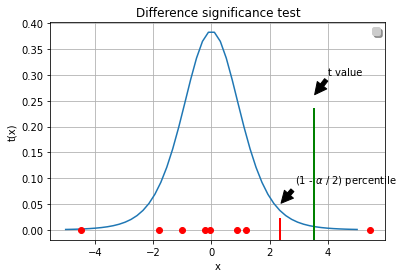

In [1]:
# (7)

import string
import math
import sys

from scipy.stats import  t
import matplotlib.pyplot as plt
import numpy as np

##############
# Parameters #
##############
ver = 1
verbose = 0
alpha = 0.05

def usage():
    print('usage: ./program data_file(one sample in one line)')

def main():

    ##########
    # Sample #
    ##########
    if (len(sys.argv) < 2):
        usage()
        sys.exit()

    f = open('./data.txt')
    # f = open('./test.txt')
#     f = open(sys.argv[1])

    try:
        sample1_text = f.readline()
        sample2_text = f.readline()
    finally:
        f.close()

    if (verbose):
        print("sample1 text: ", sample1_text)
        print("sample2 text: ", sample2_text)

    sample1_text_split = sample1_text.split()
    sample2_text_split = sample2_text.split()

    if (verbose):
        print(sample1_text_split)
        print(sample2_text_split)
        print("len = ", len(sample1_text_split))

    assert(len(sample1_text_split) == len(sample2_text_split))
    sample_len = len(sample1_text_split)

    sample1 = []
    sample2 = []

    for i in range(sample_len):
        sample1.append(float(sample1_text_split[i]))
        sample2.append(float(sample2_text_split[i]))

    sample_diff = []

    for i in range(sample_len):
        sample_diff.append(sample1[i] - sample2[i])

    if (verbose):
        print("sample_diff = ", sample_diff)


    ######################
    # Hypothesis testing #
    ######################
    sample = sample_diff

    numargs = t.numargs
    [ df ] = [sample_len - 1,] * numargs
    if (verbose):
        print("df(degree of freedom, student's t distribution parameter) = ", df)

    sample_mean = np.mean(sample)
    sample_std = np.std(sample, dtype=np.float64, ddof=1)
    if (verbose):
        print("mean = %f, std = %f" % (sample_mean, sample_std))

    abs_t = math.fabs( sample_mean / (sample_std / math.sqrt(sample_len)) )
    if (verbose):
        print("t = ", abs_t)

    t_alpha_percentile = t.ppf(1 - alpha / 2, df)

    if (verbose):
        print("abs_t = ", abs_t)
        print("t_alpha_percentile = ", t_alpha_percentile)

    if (abs_t >= t_alpha_percentile):
#         print("REJECT the null hypothesis")
        print("沒有顯著差異")
    else:
#         print("ACCEPT the null hypothesis")
        print("有顯著差異")

    ########
    # Plot #
    ########
    rv = t(df)
    limit = np.minimum(rv.dist.b, 5)
    x = np.linspace(-1 * limit, limit)
    h = plt.plot(x, rv.pdf(x))
    plt.xlabel('x')
    plt.ylabel('t(x)')
    plt.title('Difference significance test')
    plt.grid(True)
    plt.axvline(x = t_alpha_percentile, ymin = 0, ymax = 0.095, 
            linewidth=2, color='r')
    plt.axvline(x = abs_t, ymin = 0, ymax = 0.6, 
            linewidth=2, color='g')

    plt.annotate(r'(1 - $\alpha$ / 2) percentile', xy = (t_alpha_percentile, 0.05),
            xytext=(t_alpha_percentile + 0.5, 0.09), arrowprops=dict(facecolor = 'black', shrink = 0.05),)
    plt.annotate('t value', xy = (abs_t, 0.26),
            xytext=(abs_t + 0.5, 0.30), arrowprops=dict(facecolor = 'black', shrink = 0.05),)

    leg = plt.legend(('Student\'s t distribution', r'(1 - $\alpha$ / 2) percentile', 't value'), 
            'upper left', shadow = True)
    frame = leg.get_frame()
    frame.set_facecolor('0.80')
    for i in leg.get_texts():
        i.set_fontsize('small')

    for l in leg.get_lines():
        l.set_linewidth(1.5)

    normalized_sample = [0] * sample_len 
    for i in range(0, sample_len):
        normalized_sample[i] = (sample[i] - sample_mean) / (sample_std / math.sqrt(sample_len))
    plt.plot(normalized_sample, [0] * len(normalized_sample), 'ro')
    plt.show()

if __name__ == "__main__":
    main()

有顯著差異


c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Legend does not support "Student's t distribution" instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Legend does not support '(1 - $\\alpha$ / 2) percentile' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Legend does not support 't value' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artis

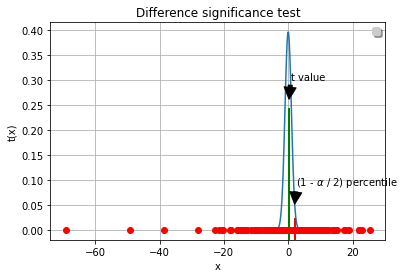

In [2]:
# (10)
import pandas as pd
df = pd.read_csv('./hitstory.csv')
df.head()

ver = 1
verbose = 0
alpha = 0.05

sample1_text_split = df['Emerging.Markets'].to_numpy()
sample2_text_split = df['Global.Macro'].to_numpy()
def usage():
    print('usage: ./program data_file(one sample in one line)')

def main():

    ##########
    # Sample #
    ##########
    if (len(sys.argv) < 2):
        usage()
        sys.exit()

#     f = open('./data.txt')
    # f = open('./test.txt')
#     f = open(sys.argv[1])

#     try:
#         sample1_text = f.readline()
#         sample2_text = f.readline()
#     finally:
#         f.close()

#     if (verbose):
#         print("sample1 text: ", sample1_text)
#         print("sample2 text: ", sample2_text)

    

    if (verbose):
        print(sample1_text_split)
        print(sample2_text_split)
        print("len = ", len(sample1_text_split))

    assert(len(sample1_text_split) == len(sample2_text_split))
    sample_len = len(sample1_text_split)

    sample1 = []
    sample2 = []

    for i in range(sample_len):
        sample1.append(float(sample1_text_split[i]))
        sample2.append(float(sample2_text_split[i]))

    sample_diff = []

    for i in range(sample_len):
        sample_diff.append(sample1[i] - sample2[i])

    if (verbose):
        print("sample_diff = ", sample_diff)


    ######################
    # Hypothesis testing #
    ######################
    sample = sample_diff

    numargs = t.numargs
    [ df ] = [sample_len - 1,] * numargs
    if (verbose):
        print("df(degree of freedom, student's t distribution parameter) = ", df)

    sample_mean = np.mean(sample)
    sample_std = np.std(sample, dtype=np.float64, ddof=1)
    if (verbose):
        print("mean = %f, std = %f" % (sample_mean, sample_std))

    abs_t = math.fabs( sample_mean / (sample_std / math.sqrt(sample_len)) )
    if (verbose):
        print("t = ", abs_t)

    t_alpha_percentile = t.ppf(1 - alpha / 2, df)

    if (verbose):
        print("abs_t = ", abs_t)
        print("t_alpha_percentile = ", t_alpha_percentile)

    if (abs_t >= t_alpha_percentile):
#         print("REJECT the null hypothesis")
        print("沒有顯著差異")
    else:
#         print("ACCEPT the null hypothesis")
        print("有顯著差異")

    ########
    # Plot #
    ########
    rv = t(df)
    limit = np.minimum(rv.dist.b, 5)
    x = np.linspace(-1 * limit, limit)
    h = plt.plot(x, rv.pdf(x))
    plt.xlabel('x')
    plt.ylabel('t(x)')
    plt.title('Difference significance test')
    plt.grid(True)
    plt.axvline(x = t_alpha_percentile, ymin = 0, ymax = 0.095, 
            linewidth=2, color='r')
    plt.axvline(x = abs_t, ymin = 0, ymax = 0.6, 
            linewidth=2, color='g')

    plt.annotate(r'(1 - $\alpha$ / 2) percentile', xy = (t_alpha_percentile, 0.05),
            xytext=(t_alpha_percentile + 0.5, 0.09), arrowprops=dict(facecolor = 'black', shrink = 0.05),)
    plt.annotate('t value', xy = (abs_t, 0.26),
            xytext=(abs_t + 0.5, 0.30), arrowprops=dict(facecolor = 'black', shrink = 0.05),)

    leg = plt.legend(('Student\'s t distribution', r'(1 - $\alpha$ / 2) percentile', 't value'), 
            'upper left', shadow = True)
    frame = leg.get_frame()
    frame.set_facecolor('0.80')
    for i in leg.get_texts():
        i.set_fontsize('small')

    for l in leg.get_lines():
        l.set_linewidth(1.5)

    normalized_sample = [0] * sample_len 
    for i in range(0, sample_len):
        normalized_sample[i] = (sample[i] - sample_mean) / (sample_std / math.sqrt(sample_len))
    plt.plot(normalized_sample, [0] * len(normalized_sample), 'ro')
    plt.show()

if __name__ == "__main__":
    main()

In [3]:
# (11)

# 計算兩組成對資料t檢定:
dat1 = df['Emerging.Markets'].to_numpy()
dat2 = df['Global.Macro'].to_numpy()
import scipy.stats
scipy.stats.ttest_rel(dat1, dat2)

# 結果: Ttest_relResult(statistic=0.23846933281992622, pvalue=0.8118404160424869)
# p = 0.8118404160424869 > 0.05，接受假設H0:不相信兩種風格沒差異

Ttest_relResult(statistic=0.23846933281992622, pvalue=0.8118404160424869)